In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 8.5 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=44d3850cd54e4d3351ba4278d98971425b5efca9a714f03e46cc72b3e20a9394
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 3.9 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline
from pyspark.sql.functions import *
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, OneHotEncoder
from pyspark.ml.stat import Correlation
from pyspark.ml import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import corr
from pyspark.sql.functions import *
import xlsxwriter



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
spark = SparkSession.builder.appName("DataPreprocessing").getOrCreate()
df = spark.read.csv("/content/gdrive/My Drive/ML_hw_dataset (1).csv", header=True, inferSchema=True)
df.show()

+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
|age|        job| marital|        education|default|housing|loan|  contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+-----------+--------+-----------------+-------+-------+----+---------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+
| 44|blue-collar| married|         basic.4y|unknown|    yes|  no| cellular|  aug|        thu|     210|       1|  999|       0|nonexistent|         1.4|        93.444|        -36.1|    4.963|     5228.1|  0|
| 53| technician| married|          unknown|     no|     no|  no| cellular|  nov|        fri|     138|       1|  999|       0|nonexistent|        -0.1|          93.2|      

Nulls:
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+

We have no null values in this dataset.


<Axes: >

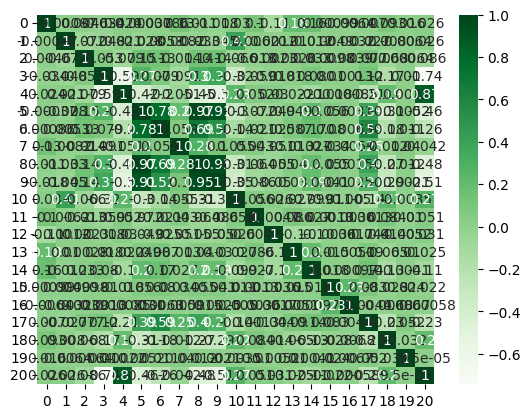

In [ ]:
import seaborn as sns
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

spark = SparkSession.builder.appName("Soal 1").getOrCreate()
df = spark.read.options(inferSchema='True',delimiter=',',header='True').csv("/content/gdrive/My Drive/ML_hw_dataset (1).csv")
# Null-checker
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
print("Nulls:")
null_counts.show()
print("We have no null values in this dataset.")

# String to number
string_cols = [c for c, t in df.dtypes if t == "string"]
for col_name in string_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_num")
    df = indexer.fit(df).transform(df).drop(col_name).withColumnRenamed(f"{col_name}_num", col_name)
for col_name in df.columns:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

# Correlation Heatmap
assembler = VectorAssembler(inputCols=df.columns, outputCol="features")
df = assembler.transform(df).select("features")
corr_matrix = Correlation.corr(df, "features").head()[0].toArray()
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [ ]:
pip install xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Nulls:
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|age|job|marital|education|default|housing|loan|contact|month|day_of_week|duration|campaign|pdays|previous|poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+
|  0|  0|      0|        0|      0|      0|   0|      0|    0|          0|       0|       0|    0|       0|       0|           0|             0|            0|        0|          0|  0|
+---+---+-------+---------+-------+-------+----+-------+-----+-----------+--------+--------+-----+--------+--------+------------+--------------+-------------+---------+-----------+---+

We have no null values in this dataset.


<Axes: >

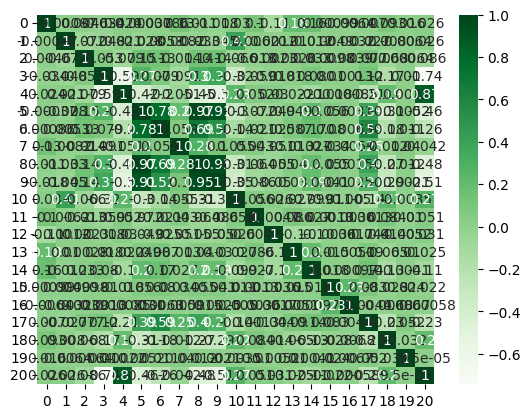

In [43]:
import seaborn as sns
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col, isnan, when, count
from pyspark.sql.types import DoubleType
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
#EDA 
spark = SparkSession.builder.appName("Soal 1").getOrCreate()
df = spark.read.options(inferSchema='True',delimiter=',',header='True').csv("/content/gdrive/My Drive/ML_hw_dataset (1).csv")
df.describe().show
# Null-checker
null_counts = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])
print("Nulls:")
null_counts.show()
print("We have no null values in this dataset.")

# String to number
string_cols = [c for c, t in df.dtypes if t == "string"]
for col_name in string_cols:
    indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_num")
    df = indexer.fit(df).transform(df).drop(col_name).withColumnRenamed(f"{col_name}_num", col_name)
for col_name in df.columns:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

# Correlation Heatmap
assembler = VectorAssembler(inputCols=df.columns, outputCol="features")
df = assembler.transform(df).select("features")
corr_matrix = Correlation.corr(df, "features").head()[0].toArray()
sns.heatmap(corr_matrix, annot=True, cmap="Greens")

In [ ]:

spark = SparkSession.builder.appName("DataPreprocessing").getOrCreate()
df = spark.read.csv("/content/gdrive/My Drive/ML_hw_dataset (1).csv", header=True, inferSchema=True)

string_cols = [c for c, t in df.dtypes if t == "string"]
indexers = {c: StringIndexer(inputCol=c, outputCol=c+"_index") for c in string_cols}

indexed_df = df
for c, indexer in indexers.items():
    indexed_df = indexer.fit(indexed_df).transform(indexed_df)
print("Before:")
indexed_df.show(3)
numeric_cols = [c for c, t in indexed_df.dtypes if t in ["int", "double", "float", "long"]]
numeric_df = indexed_df.select(numeric_cols)
print("**********************************************************************************\nAfter:")
numeric_df.show(3)
#hame column ha ra be yek vector tabdil mikonim:
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=numeric_df.columns, outputCol=vector_col)
df_vector = assembler.transform(numeric_df).select(vector_col)

#correlation:
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0] 
corr_matrix = matrix.toArray().tolist() 
print(type(corr_matrix))
#save as xls:
with xlsxwriter.Workbook('/content/gdrive/My Drive/mycorrelation.xlsx') as workbook:
    worksheet = workbook.add_worksheet()
    for row_num, data in enumerate(corr_matrix):
        worksheet.write_row(row_num, 0, data)


Before:
+---+-----------+-------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+-----------+-----------------+--------------+
|age|        job|marital|        education|default|housing|loan| contact|month|day_of_week|duration|campaign|pdays|previous|   poutcome|emp_var_rate|cons_price_idx|cons_conf_idx|euribor3m|nr_employed|  y|job_index|marital_index|education_index|default_index|housing_index|loan_index|contact_index|month_index|day_of_week_index|poutcome_index|
+---+-----------+-------+-----------------+-------+-------+----+--------+-----+-----------+--------+--------+-----+--------+-----------+------------+--------------+-------------+---------+-----------+---+---------+-------------+---------------+-------------+-------------+----------+-------------+---------

In [ ]:
from pyspark.ml.feature import MinMaxScaler

# Define the input columns and assemble into a dense vector

inputCols = numeric_df.columns
#print(inputCols)
inputCols.remove("y")  # Remove the label column
assembler = VectorAssembler(inputCols=inputCols, outputCol="inputFeatures")

# Scale the input columns using MinMaxScaler and fit the transformer to the data
scaler = MinMaxScaler(inputCol="inputFeatures", outputCol="scaledFeatures", min=0, max=1)
scalerModel = scaler.fit(assembler.transform(numeric_df))

# Transform the data by scaling the input columns and converting the result to a dense vector
#scaledData = scalerModel.transform(assembler.transform(numeric_df)).select("scaledFeatures").rdd.map(lambda x: x[0].toArray()).collect()
scaledData = scalerModel.transform(assembler.transform(numeric_df)).select("scaledFeatures","y")
scaledData.show(truncate=False)
# Display the first 10 rows of the scaled data
#for i in range(10):
#    print(scaledData[i])
from pyspark.ml.feature import PCA
pca = PCA(k=18, inputCol="scaledFeatures", outputCol="pcaFeatures")
model = pca.fit(scaledData)
result = model.transform(scaledData).select("pcaFeatures","y")

# Show the resulting dataframe
result.show()
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
(trainingData, testData) = result.randomSplit([0.8, 0.2],seed=1234)

# Train a logistic regression model
lr = LogisticRegression(labelCol="y", featuresCol="pcaFeatures")
# fit the model
model = lr.fit(trainingData)

# Make predictions on the test set
predictions = model.transform(testData)

# Evaluate the performance of the model
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="y")
auc = evaluator.evaluate(predictions)

# Print the AUC score
print("AUC score: ", auc)


+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---+
|scaledFeatures                                                                                                                                                                                                                                                                               |y  |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---+
|(20,[0,1,3,5,6,7,8,9,10,12,13,17],[0.3333333333333333,0.04270028466856446,1.0,1.0,0.4844115354637599,0.615062761506276,0.98

In [ ]:
from pyspark.sql.functions import col
for i in df.columns:
  null_count=df.where(col(i).isNull()).count()
  print(f"column '{i}' has {null_count} null values.")


column 'features' has 0 null values.


In [ ]:
a=model.evaluate(trainingData)
a.accuracy

0.9099326088276365

In [ ]:
print(a.precisionByLabel)
print(a.recallByLabel)

[0.9281039367002052, 0.6597938144329897]
[0.9740619233135124, 0.4]
